# Лабораторная работа №1: Функции Сфера и Розенброк
### Градиентный спуск и его модификации
Крижановская Анна, М8О-109СВ-24

В данной работе реализованы две тестовые функции оптимизации:
- **Сфера** – простая функция, равная сумме квадратов координат.
- **Розенброк** – классическая функция с узкой долиной, усложняющая поиск минимума.

Также реализованы различные модификации алгоритма градиентного спуска, включая:
- Градиентный спуск с моментумом
- Метод AdaGrad
- Градиентный спуск с экспоненциальным уменьшением шага обучения

Все ячейки содержат необходимые определения функций, тестирование и визуализацию результатов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Определение тестовых функций: Сфера и Розенброк

In [2]:
def sphere(x):
    """
    Функция Сфера: вычисляет сумму квадратов координат.

    Параметры:
        x (np.array): Вектор координат.

    Возвращает:
        float: Значение функции для вектора x.
    """
    return np.sum(np.power(x, 2))

def rosenbrock(x):
    """
    Функция Розенброк (для двумерного случая):
    f(x) = 100*(x2 - x1^2)^2 + (1 - x1)^2

    Параметры:
        x (np.array): Вектор размерности 2, где x[0] — x1, x[1] — x2.

    Возвращает:
        float: Значение функции Розенброка для вектора x.
    """
    x1 = x[0]
    x2 = x[1]
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

## Функция для численного вычисления градиента

In [3]:
def numerical_gradient(f, x, h=1e-5):
    """
    Численное вычисление градиента функции f в точке x.

    Параметры:
        f: функция, для которой вычисляется градиент.
        x: массив координат, где вычисляется градиент.
        h: шаг для конечных разностей (по умолчанию 1e-5).

    Возвращает:
        grad: массив градиента той же размерности, что и x.
    """
    grad = np.zeros_like(x, dtype=float)
    fx = f(x)  # Значение функции в текущей точке
    for i in range(len(x)):
        x[i] += h
        grad[i] = (f(x) - fx) / h
        x[i] -= h
    return grad

## Реализация классического градиентного спуска

In [4]:
def gradient_descent(f, grad_f, x0, alpha=0.01, epsilon=1e-6, max_iters=1000):
    """
    Алгоритм градиентного спуска для минимизации функции f.

    Параметры:
        f: минимизируемая функция.
        grad_f: функция для вычисления градиента (или численный метод).
        x0: начальная точка (массив).
        alpha: шаг обучения (по умолчанию 0.01).
        epsilon: точность сходимости (по умолчанию 1e-6).
        max_iters: максимальное количество итераций (по умолчанию 1000).

    Возвращает:
        x: найденная точка минимума.
        trajectory: массив всех точек траектории оптимизации.
    """
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]

    for i in range(max_iters):
        grad = grad_f(f, x) if callable(grad_f) else grad_f(x)
        x_new = x - alpha * grad
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < epsilon:
            print(f"Сходимость достигнута за {i + 1} итераций.")
            break
        x = x_new

    return x, np.array(trajectory)

## Визуализация функции и траектории оптимизации

In [5]:
def plot_3d_function_with_trajectory(f, trajectory, title, x_bounds=(-5, 5), y_bounds=(-5, 5)):
    """
    Построение 3D-графика функции с отображением траектории градиентного спуска.

    Параметры:
        f: минимизируемая функция.
        trajectory: траектория оптимизации (массив точек).
        title: заголовок графика.
        x_bounds: границы по оси x (по умолчанию от -5 до 5).
        y_bounds: границы по оси y (по умолчанию от -5 до 5).
    """
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Создаем сетку для построения поверхности
    x = np.linspace(x_bounds[0], x_bounds[1], 100)
    y = np.linspace(y_bounds[0], y_bounds[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[f([xi, yi]) for xi, yi in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

    # Построение поверхности
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot', alpha=0.6, edgecolor='none')

    # Отображение траектории оптимизации
    ax.plot(trajectory[:, 0], trajectory[:, 1], [f(point) for point in trajectory], 'k-', label="Gradient descent", alpha=0.7)

    # Начальная точка и найденный минимум
    ax.plot([trajectory[0, 0]], [trajectory[0, 1]], [f(trajectory[0])], 'kD', markersize=10, label="Start point")
    ax.plot([trajectory[-1, 0]], [trajectory[-1, 1]], [f(trajectory[-1])], 'kx', markersize=10, label="Found min")

    # Глобальный минимум (если известен)
    if f == sphere:
        ax.plot([0.], [0.], [sphere([0., 0.])], 'ro', markersize=10, label="Global min")
    elif f == rosenbrock:
        ax.plot([1.], [1.], [rosenbrock([1., 1.])], 'ro', markersize=10, label="Global min")

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title(title)
    ax.legend()
    plt.show()

## Тестирование классического градиентного спуска для функций Сфера и Розенброк

Сходимость достигнута за 537 итераций.
Минимум для функции Сфера: [2.47350914e-05 3.46467555e-05]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


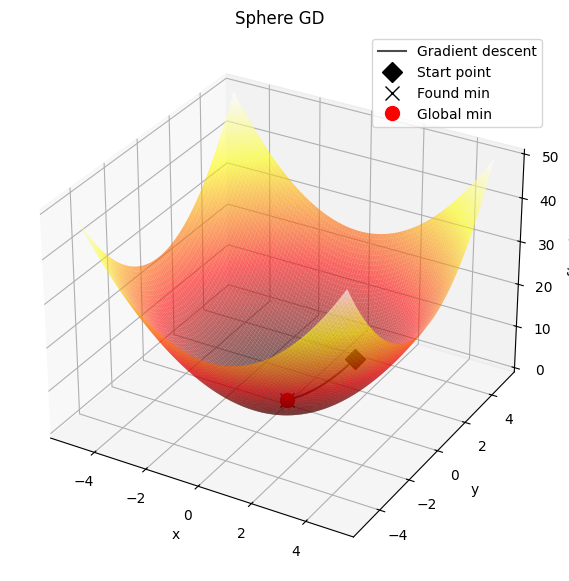

Минимум для функции Розенброк: [0.5336965  0.22169784]


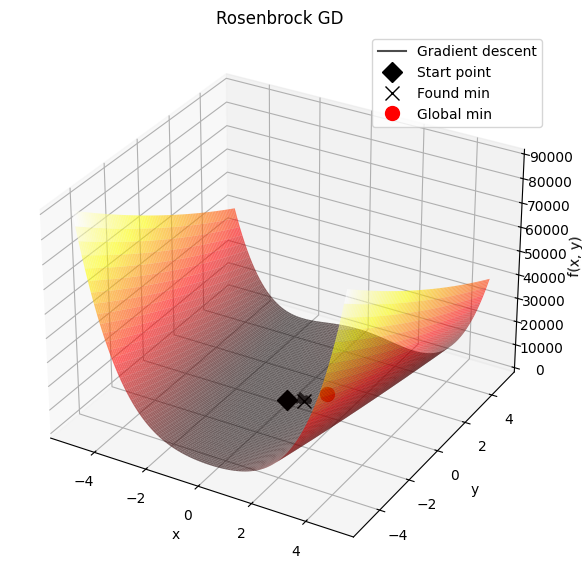

In [6]:
def test_functions():
    """
    Тестирование функций с использованием градиентного спуска и визуализация результатов.
    """
    # Тест для функции Сфера
    x0_sphere = [1.5, 2.0]  # Начальная точка для сферы
    result_sph, trajectory_sph = gradient_descent(sphere, numerical_gradient, x0_sphere, alpha=0.01)
    print("Минимум для функции Сфера:", result_sph)
    plot_3d_function_with_trajectory(sphere, trajectory_sph, "Sphere GD")

    # Тест для функции Розенброк
    x0_rosen = [0.0, 0.0]  # Начальная точка для Розенброка
    result_ros, trajectory_ros = gradient_descent(rosenbrock, numerical_gradient, x0_rosen, alpha=0.005)
    print("Минимум для функции Розенброк:", result_ros)
    plot_3d_function_with_trajectory(rosenbrock, trajectory_ros, "Rosenbrock GD")

test_functions()

## Модификации алгоритма градиентного спуска

In [7]:
def gradient_descent_momentum(f, grad_f, x0, alpha=0.01, beta=0.9, epsilon=1e-6, max_iters=1000):
    """
    Градиентный спуск с моментумом для ускорения сходимости.

    Параметры:
        f: минимизируемая функция.
        grad_f: функция для вычисления градиента.
        x0: начальная точка.
        alpha: шаг обучения.
        beta: коэффициент момента.
        epsilon: точность сходимости.
        max_iters: максимальное количество итераций.

    Возвращает:
        x: найденная точка минимума.
        trajectory: траектория точек оптимизации.
    """
    x = np.array(x0, dtype=float)
    velocity = np.zeros_like(x)
    trajectory = [x.copy()]

    for i in range(max_iters):
        grad = grad_f(f, x)
        velocity = beta * velocity + (1 - beta) * grad
        x_new = x - alpha * velocity
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < epsilon:
            print(f"Сходимость (momentum) достигнута за {i + 1} итераций.")
            break
        x = x_new

    return x, np.array(trajectory)

def adagrad(f, grad_f, x0, alpha=0.1, epsilon=1e-6, max_iters=1000):
    """
    Метод AdaGrad для оптимизации.

    Параметры:
        f: минимизируемая функция.
        grad_f: функция для вычисления градиента.
        x0: начальная точка.
        alpha: начальный шаг обучения.
        epsilon: точность сходимости.
        max_iters: максимальное количество итераций.

    Возвращает:
        x: найденная точка минимума.
        trajectory: траектория точек оптимизации.
    """
    x = np.array(x0, dtype=float)
    grad_squared_sum = np.zeros_like(x)
    trajectory = [x.copy()]

    for i in range(max_iters):
        grad = grad_f(f, x)
        grad_squared_sum += grad**2
        adjusted_grad = grad / (np.sqrt(grad_squared_sum) + 1e-8)
        x_new = x - alpha * adjusted_grad
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < epsilon:
            print(f"Сходимость (AdaGrad) достигнута за {i + 1} итераций.")
            break
        x = x_new

    return x, np.array(trajectory)

def gradient_descent_decay(f, grad_f, x0, alpha=0.1, decay_rate=0.99, epsilon=1e-6, max_iters=1000):
    """
    Градиентный спуск с экспоненциальным уменьшением шага обучения.

    Параметры:
        f: минимизируемая функция.
        grad_f: функция для вычисления градиента.
        x0: начальная точка.
        alpha: начальный шаг обучения.
        decay_rate: коэффициент уменьшения шага.
        epsilon: точность сходимости.
        max_iters: максимальное количество итераций.

    Возвращает:
        x: найденная точка минимума.
        trajectory: траектория точек оптимизации.
    """
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]

    for i in range(max_iters):
        grad = grad_f(f, x)
        x_new = x - alpha * grad
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < epsilon:
            print(f"Сходимость (decay) достигнута за {i + 1} итераций.")
            break
        x = x_new
        alpha *= decay_rate

    return x, np.array(trajectory)

## Функция для случайного выбора начальной точки и запуска выбранного метода

In [8]:
def random_start(f, grad_f, bounds, alpha=0.01, method='momentum'):
    """
    Выбор случайной начальной точки и запуск выбранного метода оптимизации.

    Параметры:
        f: минимизируемая функция.
        grad_f: функция для вычисления градиента.
        bounds: границы для случайной точки ([min, max]).
        alpha: шаг обучения.
        method: метод оптимизации ('momentum', 'adagrad', 'decay').

    Возвращает:
        Результат работы выбранного метода (точка минимума, траектория оптимизации).
    """
    x0 = np.random.uniform(bounds[0], bounds[1], size=2)
    if method == 'momentum':
        return gradient_descent_momentum(f, grad_f, x0, alpha=alpha)
    elif method == 'adagrad':
        return adagrad(f, grad_f, x0, alpha=alpha)
    elif method == 'decay':
        return gradient_descent_decay(f, grad_f, x0, alpha=alpha)
    else:
        raise ValueError("Неизвестный метод оптимизации")

## Тестирование модификаций градиентного спуска

Сходимость (momentum) достигнута за 398 итераций.
Результат (Сфера, Momentum): [-1.44325705e-05  3.07326993e-05]


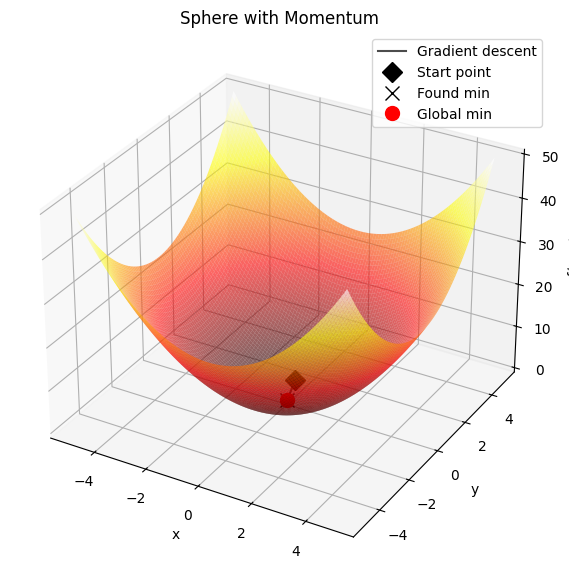

Результат (Розенброк, AdaGrad): [2.29930581 5.2890848 ]


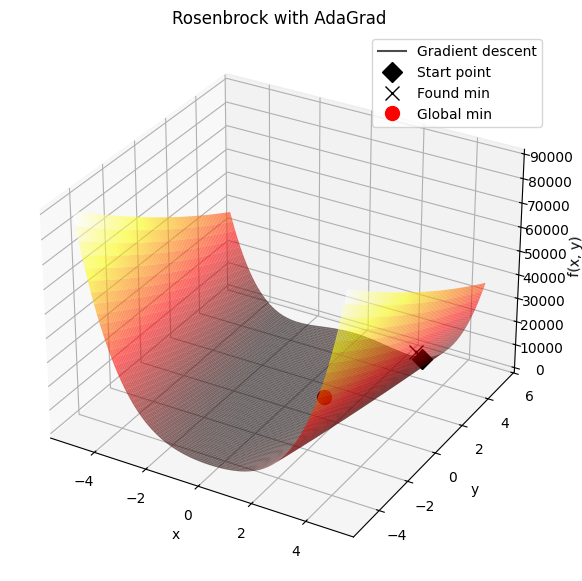

Сходимость (decay) достигнута за 85 итераций.
Результат (Сфера, Decay): [-1.10946459e-05 -1.41809919e-05]


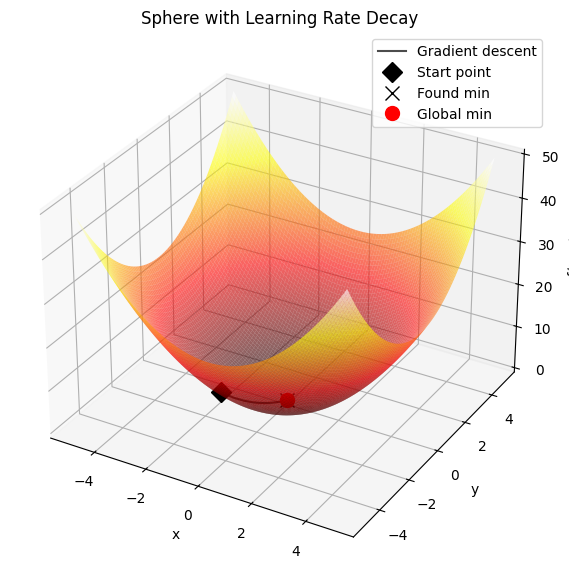

Сходимость (decay) достигнута за 4 итераций.
Результат (Розенброк, Decay): [6.30918617e+32 1.40847446e+07]


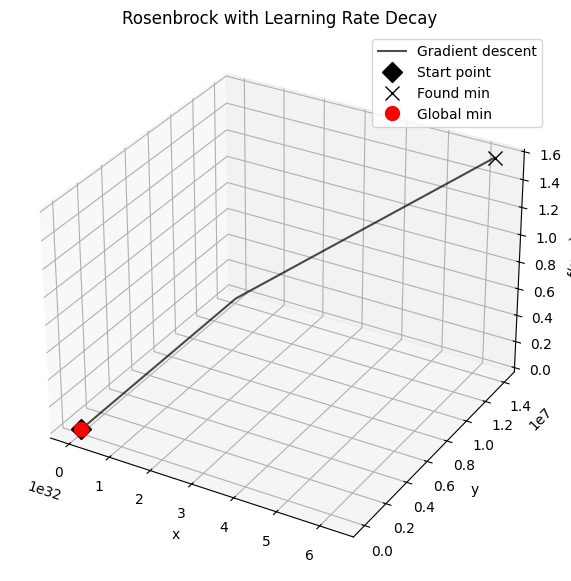

In [9]:
def test_modifications():
    bounds = [-5, 5]

    # Тест: Градиентный спуск с моментумом для функции Сфера
    result_sph_mom, trajectory_sph_mom = random_start(sphere, numerical_gradient, bounds, alpha=0.01, method='momentum')
    print("Результат (Сфера, Momentum):", result_sph_mom)
    plot_3d_function_with_trajectory(sphere, trajectory_sph_mom, "Sphere with Momentum")

    # Тест: AdaGrad для функции Розенброк
    result_ros_adagrad, trajectory_ros_adagrad = random_start(rosenbrock, numerical_gradient, bounds, alpha=0.1, method='adagrad')
    print("Результат (Розенброк, AdaGrad):", result_ros_adagrad)
    plot_3d_function_with_trajectory(rosenbrock, trajectory_ros_adagrad, "Rosenbrock with AdaGrad")

    # Тест: Градиентный спуск с уменьшением шага обучения для функции Сфера
    result_sph_decay, trajectory_sph_decay = random_start(sphere, numerical_gradient, bounds, alpha=0.1, method='decay')
    print("Результат (Сфера, Decay):", result_sph_decay)
    plot_3d_function_with_trajectory(sphere, trajectory_sph_decay, "Sphere with Learning Rate Decay")

    # Дополнительный тест для функции Розенброк с уменьшением шага
    result_ros_decay, trajectory_ros_decay = random_start(rosenbrock, numerical_gradient, bounds, alpha=0.1, method='decay')
    print("Результат (Розенброк, Decay):", result_ros_decay)
    plot_3d_function_with_trajectory(rosenbrock, trajectory_ros_decay, "Rosenbrock with Learning Rate Decay")

test_modifications()